<a id='top'></a>
# Society Data
## Investigate how a countries societal scores may have been affected by their rapid growth. For example:
1. How did the perception of corruption change during expansive growth, for the top 10 countries of the world?
1. How did the GINI coefficient change, if any, during expansive growth?

## Table of Contents

<ul>
    <li><a href="#data_wrangling">Data Wrangling</a></li>
    <li>EDA Continued</li>
    <ul>
        <li><a href="#question_1">Question 1</a></li>
        <li><a href="#question_2">Question 2</a></li>
    </ul>
    <li><a href="#conclusions">Conclusions</a></li>
</ul>


<a id='data_wrangling'></a>
# Data Wrangling

Utilizing an economic growth dataset, **GINI coefficient** from gapminder.com/data

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

mpl.style.use('ggplot')
%matplotlib inline

In [3]:
# Load corruption data
corruption_df = pd.read_csv("data_political/corruption_perception_index_cpi.csv")

# Using the results from the "investigate_GDP per capita" notebook, create a list of the top 10 fastest countries
top10 = ['Myanmar', 'China','Azerbaijan','Turkmenistan','Armenia','Ethiopia','Georgia','Cambodia','Bhutan','Mongolia']
top10index = list(range(0,10,1))


In [4]:
# add in their country name & rank. Here, I could have used the index as their rank but I suspected it would be safer to
# designate them in a dedicated column named 'rank'
top10_df = pd.DataFrame({'country':top10, 'rank':top10index})
top10_df.head(3)

,country,rank
0,Myanmar,0
1,China,1
2,Azerbaijan,2


In [5]:
# It is desirable to work with the fastest growing countries. Pull out the items according to the top10 list
corruption_top10 = corruption_df.loc[corruption_df.country.isin(top10)]
corruption_top10.head

<bound method NDFrame.head of           country  2012  2013  2014  2015  2016  2017
5         Armenia  34.0  36.0  37.0  35.0  33.0    35
8      Azerbaijan  27.0  28.0  29.0  29.0  30.0    31
16         Bhutan  63.0  63.0  65.0  65.0  65.0    67
25       Cambodia  22.0  20.0  21.0  21.0  21.0    21
32          China  39.0  40.0  36.0  37.0  40.0    41
53       Ethiopia  33.0  33.0  33.0  33.0  34.0    35
58        Georgia  52.0  49.0  52.0  52.0  57.0    56
103      Mongolia  36.0  38.0  39.0  39.0  38.0    36
107       Myanmar  15.0  21.0  21.0  22.0  28.0    30
163  Turkmenistan  17.0  17.0  17.0  18.0  22.0    19>

In [6]:
# add fastest growing rank to corruption data
corruption_top10a = corruption_top10.merge(top10_df, on='country')
corruption_top10a.head(2)

,country,2012,2013,2014,2015,2016,2017,rank
0,Armenia,34.0,36.0,37.0,35.0,33.0,35,4
1,Azerbaijan,27.0,28.0,29.0,29.0,30.0,31,2


In [7]:
# set rank as index
corruption_top10a = corruption_top10a.set_index('rank')
corruption_top10a

,country,2012,2013,2014,2015,2016,2017
rank,,,,,,,
4,Armenia,34.0,36.0,37.0,35.0,33.0,35
2,Azerbaijan,27.0,28.0,29.0,29.0,30.0,31
8,Bhutan,63.0,63.0,65.0,65.0,65.0,67
7,Cambodia,22.0,20.0,21.0,21.0,21.0,21
1,China,39.0,40.0,36.0,37.0,40.0,41
5,Ethiopia,33.0,33.0,33.0,33.0,34.0,35
6,Georgia,52.0,49.0,52.0,52.0,57.0,56
9,Mongolia,36.0,38.0,39.0,39.0,38.0,36
0,Myanmar,15.0,21.0,21.0,22.0,28.0,30


In [8]:
corruption_top10a = corruption_top10a.transpose()
corruption_top10a

rank,4,2,8,7,1,5,6,9,0,3
country,Armenia,Azerbaijan,Bhutan,Cambodia,China,Ethiopia,Georgia,Mongolia,Myanmar,Turkmenistan
2012,34,27,63,22,39,33,52,36,15,17
2013,36,28,63,20,40,33,49,38,21,17
2014,37,29,65,21,36,33,52,39,21,17
2015,35,29,65,21,37,33,52,39,22,18
2016,33,30,65,21,40,34,57,38,28,22
2017,35,31,67,21,41,35,56,36,30,19


In [9]:
# rename all column names with the first row of the dataframe with vectorizing
corruption_top10a.columns = corruption_top10a.iloc[0]
corruption_top10a = corruption_top10a.reset_index()
corruption_top10a.drop(0,inplace=True)
corruption_top10a = corruption_top10a.rename(columns={'index':'year'})
corruption_top10a.head(3)

country,year,Armenia,Azerbaijan,Bhutan,Cambodia,China,Ethiopia,Georgia,Mongolia,Myanmar,Turkmenistan
1,2012,34,27,63,22,39,33,52,36,15,17
2,2013,36,28,63,20,40,33,49,38,21,17
3,2014,37,29,65,21,36,33,52,39,21,17


<a id='question_1'></a>
# #1 How did the perception of corruption change during expansive growth, for the top 10 countries of the world?

<a href="#top">Back to top</a>

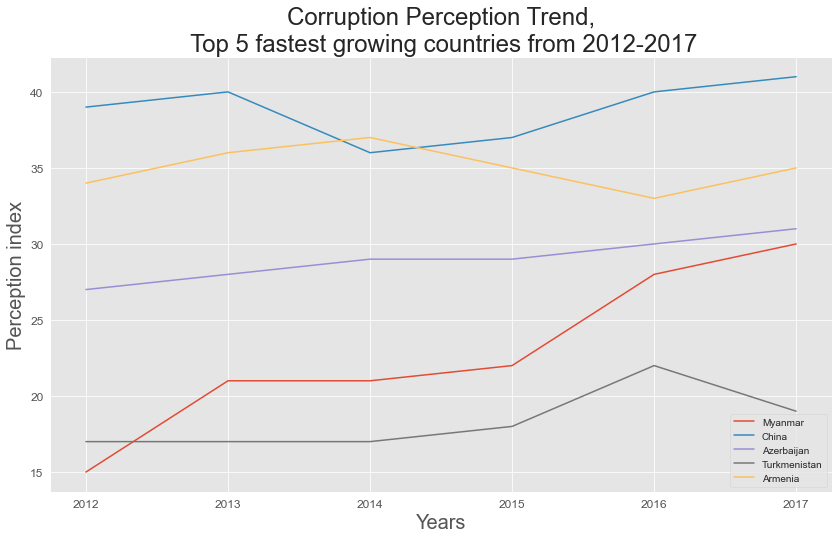

In [10]:
ax = plt.gca()

corruption_top10a.plot(x='year', y='Myanmar', kind='line', figsize=(14,8), ax=ax)
corruption_top10a.plot(x='year', y='China', kind='line', figsize=(14,8), ax=ax)
corruption_top10a.plot(x='year', y='Azerbaijan', kind='line', figsize=(14,8), ax=ax)
corruption_top10a.plot(x='year', y='Turkmenistan', kind='line', figsize=(14,8), ax=ax)
corruption_top10a.plot(x='year', y='Armenia', kind='line', figsize=(14,8), ax=ax)

plt.title("Corruption Perception Trend,\n Top 5 fastest growing countries from 2012-2017", fontsize=24)
plt.ylabel("Perception index", fontsize=20)
plt.xlabel("Years", fontsize=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12);

## Analysis:
There was an overall increase in the perception of corruption for the top 5 fastest growing countries but one cannot concluded that rapid growth is the contributing factor in that perception. Additional data such wealth gap increase, wages/capita decrease, home ownership decrease, etc. may contribute in determining correlation and/or causality. 

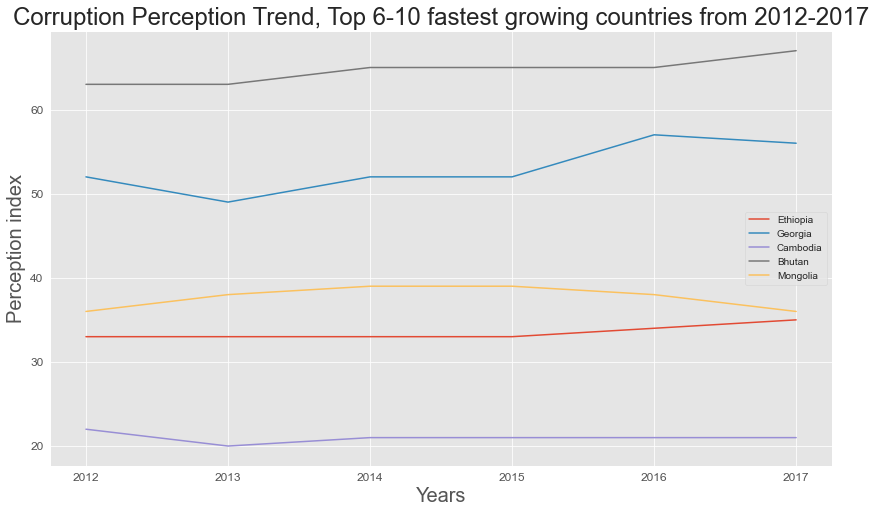

In [11]:
ax = plt.gca()

corruption_top10a.plot(x='year', y='Ethiopia', kind='line', figsize=(14,8), ax=ax)
corruption_top10a.plot(x='year', y='Georgia', kind='line', figsize=(14,8), ax=ax)
corruption_top10a.plot(x='year', y='Cambodia', kind='line', figsize=(14,8), ax=ax)
corruption_top10a.plot(x='year', y='Bhutan', kind='line', figsize=(14,8), ax=ax)
corruption_top10a.plot(x='year', y='Mongolia', kind='line', figsize=(14,8), ax=ax)

plt.title("Corruption Perception Trend, Top 6-10 fastest growing countries from 2012-2017", fontsize=24)
plt.ylabel("Perception index", fontsize=20)
plt.xlabel("Years", fontsize=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12);

## Analysis:
There is little to no change in the corruption perception trend for the top 6-10 fastest growing countries. Focusing on the top 10 countries is short sited in making any conclusion. It would have been wiser to look at all countries and the changes in their growth to determine any correlations about their perception of corruption.

## Gini Data Wrangling

In [12]:
# read CSV data for GINI
gini_df = pd.read_csv("data_political/gini.csv")
gini_df.head(10)

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040
0,Afghanistan,30.5,30.5,30.5,30.5,30.5,30.5,30.5,30.5,30.5,...,36.8,36.8,36.8,36.8,36.8,36.8,36.8,36.8,36.8,36.8
1,Albania,38.9,38.9,38.9,38.9,38.9,38.9,38.9,38.9,38.9,...,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0
2,Algeria,56.2,56.2,56.2,56.2,56.2,56.2,56.2,56.2,56.2,...,27.6,27.6,27.6,27.6,27.6,27.6,27.6,27.6,27.6,27.6
3,Andorra,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,...,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0
4,Angola,57.2,57.2,57.2,57.2,57.2,57.2,57.2,57.2,57.2,...,42.6,42.6,42.6,42.6,42.6,42.6,42.6,42.6,42.6,42.6
5,Antigua and Barbuda,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,...,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0
6,Argentina,47.7,47.7,47.7,47.7,47.7,47.7,47.7,47.7,47.7,...,42.4,42.4,42.4,42.4,42.4,42.4,42.4,42.4,42.4,42.4
7,Armenia,31.5,31.5,31.5,31.5,31.5,31.5,31.5,31.5,31.5,...,32.6,32.6,32.6,32.6,32.6,32.6,32.6,32.6,32.6,32.6
8,Australia,38.7,38.7,38.7,38.7,38.7,38.7,38.7,38.7,38.7,...,32.3,32.3,32.3,32.3,32.3,32.3,32.3,32.3,32.3,32.3
9,Austria,33.4,33.4,33.4,33.4,33.4,33.4,33.4,33.4,33.4,...,30.5,30.5,30.5,30.5,30.5,30.5,30.5,30.5,30.5,30.5


In [13]:
# Using the results from the "investigate_GDP per capita" notebook, create a list of the top 10 fastest countries
top10 = ['Myanmar', 'China','Azerbaijan','Turkmenistan','Armenia','Ethiopia','Georgia','Cambodia','Bhutan','Mongolia']
top10index = list(range(0,10,1))
top10index

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [14]:
# add in their country name & rank. Here, I could have used the index as their rank but I suspected it would be safer to
# designate them in a dedicated column named 'rank'
top10_df = pd.DataFrame({'country':top10, 'rank':top10index})
top10_df

,country,rank
0,Myanmar,0
1,China,1
2,Azerbaijan,2
3,Turkmenistan,3
4,Armenia,4
5,Ethiopia,5
6,Georgia,6
7,Cambodia,7
8,Bhutan,8
9,Mongolia,9


In [15]:
# It is desirable to work with the fastest growing countries. Pull out the items according to the top10 list
ginitop10 = gini_df.loc[gini_df.country.isin(top10)]
ginitop10

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040
7,Armenia,31.5,31.5,31.5,31.5,31.5,31.5,31.5,31.5,31.5,...,32.6,32.6,32.6,32.6,32.6,32.6,32.6,32.6,32.6,32.6
10,Azerbaijan,70.5,70.5,70.5,70.5,70.5,70.5,70.5,70.5,70.5,...,32.4,32.4,32.4,32.4,32.4,32.4,32.4,32.4,32.4,32.4
19,Bhutan,40.9,40.9,40.9,40.9,40.9,40.9,40.9,40.9,40.9,...,37.4,37.4,37.4,37.4,37.4,37.4,37.4,37.4,37.4,37.4
28,Cambodia,42.0,42.0,42.0,42.0,42.0,42.0,42.0,42.0,42.0,...,42.0,42.0,42.0,42.0,42.0,42.0,42.0,42.0,42.0,42.0
35,China,37.1,37.1,37.1,37.1,37.1,37.1,37.1,37.1,37.1,...,39.1,39.1,39.1,39.1,39.1,39.1,39.1,39.1,39.1,39.1
56,Ethiopia,47.7,47.7,47.7,47.7,47.7,47.7,47.7,47.7,47.7,...,39.1,39.1,39.1,39.1,39.1,39.1,39.1,39.1,39.1,39.1
62,Georgia,26.9,26.9,26.9,26.9,26.9,26.9,26.9,26.9,26.9,...,36.5,36.5,36.5,36.5,36.5,36.5,36.5,36.5,36.5,36.5
113,Mongolia,32.0,32.0,32.0,32.0,32.0,32.0,32.0,32.0,32.0,...,32.4,32.4,32.4,32.4,32.4,32.4,32.4,32.4,32.4,32.4
117,Myanmar,26.2,26.2,26.2,26.2,26.2,26.2,26.2,26.2,26.2,...,38.1,38.1,38.1,38.1,38.1,38.1,38.1,38.1,38.1,38.1
180,Turkmenistan,35.0,35.0,35.0,35.0,35.0,35.0,35.0,35.0,35.0,...,46.4,46.4,46.4,46.4,46.4,46.4,46.4,46.4,46.4,46.4


In [16]:
# create a copy as a stop gap should future alterations derrange the df
ginitop10_2 = ginitop10.copy()

In [17]:
gdps_df = pd.read_csv('gdps_only.csv')
gdps_df.head(5)

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,330,330,330.0,343.0,333.0,357.0,365.0,406.0,412.0,488.0,543,529.0,576.0,588.0,584.0,574.0,571.0,572.0,564.0
1,2240,2450,2570.0,2730.0,2890.0,3060.0,3260.0,3490.0,3780.0,3930.0,4090,4210.0,4280.0,4330.0,4410.0,4520.0,4680.0,4870.0,5080.0
2,3560,3620,3770.0,3990.0,4110.0,4290.0,4300.0,4380.0,4410.0,4400.0,4480,4520.0,4590.0,4620.0,4700.0,4780.0,4830.0,4790.0,4760.0
3,40800,41400,42400.0,45500.0,47000.0,48800.0,49700.0,48700.0,43900.0,42000.0,39700,38200.0,38200.0,39100.0,40800.0,41800.0,42900.0,43900.0,44600.0
4,2200,2210,2430.0,2420.0,2600.0,2880.0,3100.0,3410.0,3650.0,3550.0,3590,3580.0,3750.0,3800.0,3840.0,3750.0,3530.0,3410.0,3230.0


In [18]:
gdps2005 = gdps_df['2005']


In [19]:
gini2005 = gini_df['2005']
gini2005

0      36.8
1      30.7
2      30.8
3      40.0
4      47.3
       ... 
190    49.3
191    36.3
192    34.8
193    50.7
194    43.2
Name: 2005, Length: 195, dtype: float64

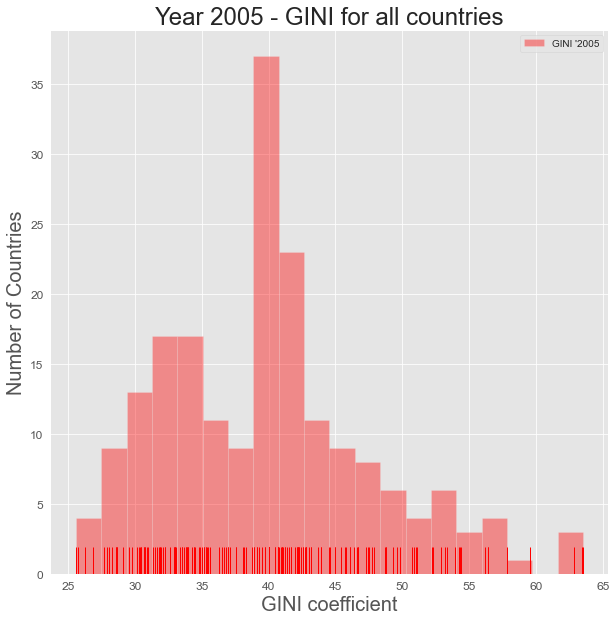

In [20]:
plt.figure(figsize=(10,10))
#sns.distplot(gdps2005, color='skyblue', bins=20, kde=False, rug=True, label="GDP/capita '2005");
sns.distplot(gini2005, color='red', bins=20, kde=False, rug=True, label="GINI '2005");
plt.legend()

plt.xlabel('GINI coefficient', fontsize=20)
plt.title('Year 2005 - GINI for all countries', fontsize=24)
plt.ylabel('Number of Countries', fontsize=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12);

In [21]:
# the top 10 fastest growing countries were obtained by calculations made on data from 2000-2018
# the gini data will do the same
years20 = [str(x) for x in range(2000,2019,1)]
years20.append('country')

In [22]:
years20

['2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '2018',
 'country']

In [23]:
# filter columns according to the years20 list above
ginitop10_2 = ginitop10_2.loc[:,years20]

In [24]:
ginitop10_2

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,country
7,36.2,35.0,35.3,35.3,34.2,33.5,32.7,30.8,29.6,29.6,29.2,29.5,30.2,30.7,31.3,31.9,32.3,32.5,32.6,Armenia
10,35.8,35.5,34.9,34.1,33.0,32.3,31.9,31.7,31.8,32.1,32.2,32.4,32.4,32.4,32.4,32.4,32.4,32.4,32.4,Azerbaijan
19,40.9,40.9,40.8,40.5,40.1,39.5,39.0,38.6,38.4,38.4,38.5,38.6,38.6,38.5,38.3,38.0,37.8,37.6,37.5,Bhutan
28,42.0,42.0,42.0,42.0,42.0,42.0,42.0,42.0,42.0,42.0,42.0,42.0,42.0,42.0,42.0,42.0,42.0,42.0,42.0,Cambodia
35,39.3,40.0,40.4,40.7,40.9,41.1,41.5,41.9,42.3,42.5,42.5,41.9,41.3,40.6,40.0,39.4,39.2,39.1,39.1,China
56,32.1,30.7,29.9,29.9,30.0,30.2,30.5,30.9,31.5,32.1,32.7,33.5,34.5,35.5,36.7,37.7,38.4,38.8,39.1,Ethiopia
62,39.7,38.8,38.1,37.4,36.9,37.1,37.4,37.7,38.3,38.8,38.9,39.0,38.8,38.1,37.5,37.0,36.6,36.5,36.5,Georgia
113,31.6,32.2,32.8,33.3,33.9,34.4,34.8,35.0,34.7,34.5,34.2,33.6,33.1,33.0,32.6,32.4,32.3,32.3,32.4,Mongolia
117,38.1,38.1,38.1,38.1,38.1,38.1,38.1,38.1,38.1,38.1,38.1,38.1,38.1,38.1,38.1,38.1,38.1,38.1,38.1,Myanmar
180,44.9,46.0,46.4,46.4,46.4,46.4,46.4,46.4,46.4,46.4,46.4,46.4,46.4,46.4,46.4,46.4,46.4,46.4,46.4,Turkmenistan


In [25]:
delta_ser = pd.Series([0],index=[0])

In [26]:
# define function that returns delta percentage

def percent_delta(row):
    country = row['country']
    percent_change = (((row['2000'] - row['2018']) / row['2000']) * 100)
    return (country,percent_change)    

In [27]:
# run precent_delta for each countr
delta_ser = ginitop10_2.apply(lambda row: percent_delta(row),axis=1)

In [28]:
delta_ser

7           (Armenia, 9.944751381215474)
10       (Azerbaijan, 9.497206703910612)
19            (Bhutan, 8.31295843520782)
28                       (Cambodia, 0.0)
35            (China, 0.508905852417292)
56       (Ethiopia, -21.806853582554517)
62          (Georgia, 8.060453400503786)
113       (Mongolia, -2.531645569620244)
117                       (Myanmar, 0.0)
180    (Turkmenistan, -3.34075723830735)
dtype: object

In [29]:
# create another saved location to return to should calculations go awry
ginitop10_3 = ginitop10_2.copy()

In [30]:
# the columns must be transposed with the row in order to create meaningful visualizations
ginitop10_3 = ginitop10_3.transpose()
ginitop10_3

,7,10,19,28,35,56,62,113,117,180
2000,36.2,35.8,40.9,42,39.3,32.1,39.7,31.6,38.1,44.9
2001,35,35.5,40.9,42,40,30.7,38.8,32.2,38.1,46
2002,35.3,34.9,40.8,42,40.4,29.9,38.1,32.8,38.1,46.4
2003,35.3,34.1,40.5,42,40.7,29.9,37.4,33.3,38.1,46.4
2004,34.2,33,40.1,42,40.9,30,36.9,33.9,38.1,46.4
2005,33.5,32.3,39.5,42,41.1,30.2,37.1,34.4,38.1,46.4
2006,32.7,31.9,39,42,41.5,30.5,37.4,34.8,38.1,46.4
2007,30.8,31.7,38.6,42,41.9,30.9,37.7,35,38.1,46.4
2008,29.6,31.8,38.4,42,42.3,31.5,38.3,34.7,38.1,46.4
2009,29.6,32.1,38.4,42,42.5,32.1,38.8,34.5,38.1,46.4


In [31]:
ginitop10_3.columns = ginitop10_3.iloc[19,:]
ginitop10_3.drop('country',inplace=True)
ginitop10_3 = ginitop10_3.reset_index()


In [32]:
ginitop10_3 = ginitop10_3.rename(columns={'index':'year'})
ginitop10_3

country,year,Armenia,Azerbaijan,Bhutan,Cambodia,China,Ethiopia,Georgia,Mongolia,Myanmar,Turkmenistan
0,2000,36.2,35.8,40.9,42,39.3,32.1,39.7,31.6,38.1,44.9
1,2001,35,35.5,40.9,42,40,30.7,38.8,32.2,38.1,46
2,2002,35.3,34.9,40.8,42,40.4,29.9,38.1,32.8,38.1,46.4
3,2003,35.3,34.1,40.5,42,40.7,29.9,37.4,33.3,38.1,46.4
4,2004,34.2,33,40.1,42,40.9,30,36.9,33.9,38.1,46.4
5,2005,33.5,32.3,39.5,42,41.1,30.2,37.1,34.4,38.1,46.4
6,2006,32.7,31.9,39,42,41.5,30.5,37.4,34.8,38.1,46.4
7,2007,30.8,31.7,38.6,42,41.9,30.9,37.7,35,38.1,46.4
8,2008,29.6,31.8,38.4,42,42.3,31.5,38.3,34.7,38.1,46.4
9,2009,29.6,32.1,38.4,42,42.5,32.1,38.8,34.5,38.1,46.4


<a id='question_2'></a>
# #2 How did the countries rapid growth affect their gini score?

<a href="#top">Back to top</a>

In [33]:
delta_ser

7           (Armenia, 9.944751381215474)
10       (Azerbaijan, 9.497206703910612)
19            (Bhutan, 8.31295843520782)
28                       (Cambodia, 0.0)
35            (China, 0.508905852417292)
56       (Ethiopia, -21.806853582554517)
62          (Georgia, 8.060453400503786)
113       (Mongolia, -2.531645569620244)
117                       (Myanmar, 0.0)
180    (Turkmenistan, -3.34075723830735)
dtype: object

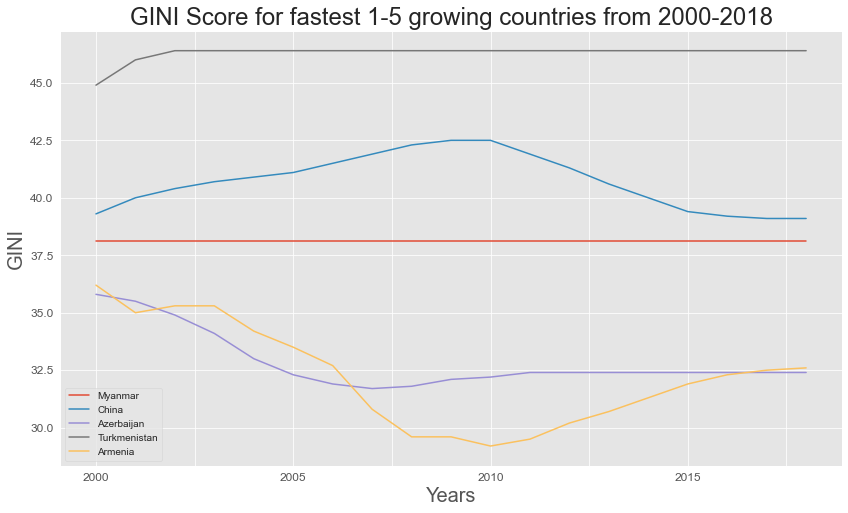

In [34]:
ax = plt.gca()

ginitop10_3.plot(x='year', y='Myanmar', kind='line', figsize=(14,8), ax=ax)
ginitop10_3.plot(x='year', y='China', kind='line', figsize=(14,8), ax=ax)
ginitop10_3.plot(x='year', y='Azerbaijan', kind='line', figsize=(14,8), ax=ax)
ginitop10_3.plot(x='year', y='Turkmenistan', kind='line', figsize=(14,8), ax=ax)
ginitop10_3.plot(x='year', y='Armenia', kind='line', figsize=(14,8), ax=ax)

plt.title("GINI Score for fastest 1-5 growing countries from 2000-2018", fontsize=24)
plt.ylabel("GINI", fontsize=20)
plt.xlabel("Years", fontsize=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12);

## Analysis

One cannot make any definitive conclusions looking at the trends between rapid growth and inequality solely. Should this analysis continue, additional data is needed to make any meaningful conclusions. 

Some additional observations between the perception of corruption & the actual inequality. Myanmar's perception of corruption doubled from 2012 to 2017 but inequality as measured by GINI remained constant as distinguished by the data collected.  

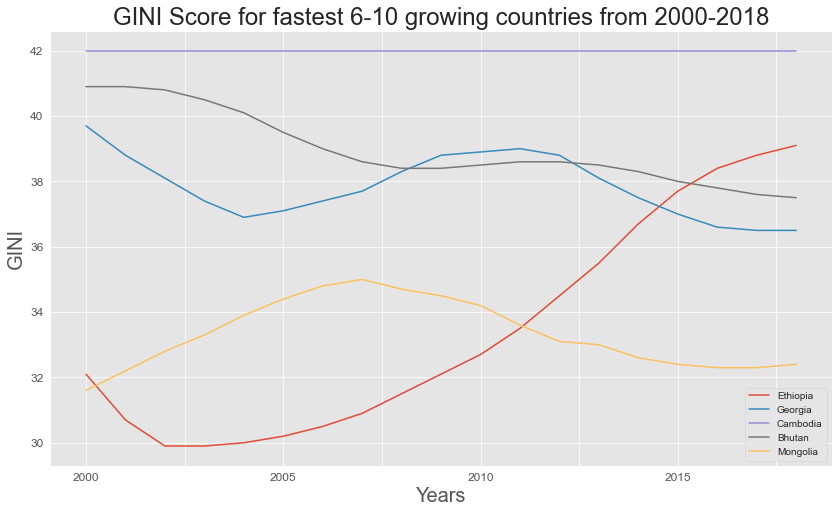

In [36]:
ax = plt.gca()

ginitop10_3.plot(x='year', y='Ethiopia', kind='line', figsize=(14,8), ax=ax)
ginitop10_3.plot(x='year', y='Georgia', kind='line', figsize=(14,8), ax=ax)
ginitop10_3.plot(x='year', y='Cambodia', kind='line', figsize=(14,8), ax=ax)
ginitop10_3.plot(x='year', y='Bhutan', kind='line', figsize=(14,8), ax=ax)
ginitop10_3.plot(x='year', y='Mongolia', kind='line', figsize=(14,8), ax=ax)

plt.title("GINI Score for fastest 6-10 growing countries from 2000-2018", fontsize=24)
plt.ylabel("GINI", fontsize=20)
plt.xlabel("Years", fontsize=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12);

<a id='conclusions'></a>
# Conclusions

### During the expansive growth from 2000-2018:

**1. How did the perception of corruption change during expansive growth, for the top 10 countries of the world?**
Visualization The top 5 fastest growing countries perception of corruption was greatest. Countries 6-10 had much less change in perception and 3 countries, Cambodia, Mongolia, & Ethopia had little to no change.

**2. How did the GINI coefficient change, if any, during expansive growth?**
Armenia, Azerbaijan, Georgia, & Bhutan's are the only countries who's GINI coefficient decreased, with Armenia having the greatest decrease at nearly **10%**. 
***
Cambodia, China, & Myanmar all remained the same, with China's score increasing until 2010, and then decreasing nearly the same. These countries also have the highest GINI coefficients of all 10 countries.
***
Ethiopia, Mongolia, & Turkmenistan's score all increased, with Ethiopia having the greatest increase in inequality.
***

<a href="#top">Back to top</a>

# Limitations

The limitations of this analysis are significant. There can be no correlations or causalities made between the significant growth of a country, its popluation's perception of corruption, and the overall inequality. At a minimum, it is advised to include all countries and the changes in their growth to determine any correlations about their perception of corruption as well as the inequality as a whole. Additionally, it would have also been good to look at the relationship between the perception of corruption and actual inequality.